Import Libraries

In [789]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve,
    balanced_accuracy_score, silhouette_score, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV 



import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Load Data

In [790]:
file_path = r"c:\Users\ezath\Downloads\heart+disease\processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
           "exang", "oldpeak", "slope", "ca", "thal", "target"]


df = pd.read_csv(file_path, header=None, names=columns, na_values="?")


In [791]:
# Transform target to binary
df['target'] = df['target'].astype(int).apply(lambda x: 1 if x > 0 else 0)

Show Data

In [792]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [793]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [794]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [795]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [796]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [797]:
df.shape

(303, 14)

In [798]:
df['sex'].value_counts()

sex
1.0    206
0.0     97
Name: count, dtype: int64

check for null values

In [799]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Cleaning Data

Handle Null Values

In [800]:
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

Check For Duplicated Values

In [801]:
print("Duplicated rows:", df.duplicated().sum())

Duplicated rows: 0


Check for Outliers

In [802]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if df[(df[col] < lower) | (df[col] > upper)].shape[0] > 0:
        outlier_cols.append(col)

print(f"cols_Outliers: {outlier_cols}")

cols_Outliers: ['cp', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']


Handle Outliers By Clipping

In [803]:
clipping_cols = [
    'trestbps', 'chol','thalach', 'oldpeak'
]

for col_2 in clipping_cols:
    Q1 = df[col_2].quantile(0.25)
    Q3 = df[col_2].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    
    df[col_2] = df[col_2].clip(lower, upper)

print(f"Clipping applied to: {clipping_cols}")
print(f"Number of rows after clipping: {df.shape[0]}")

Clipping applied to: ['trestbps', 'chol', 'thalach', 'oldpeak']
Number of rows after clipping: 303


EDA Visulization

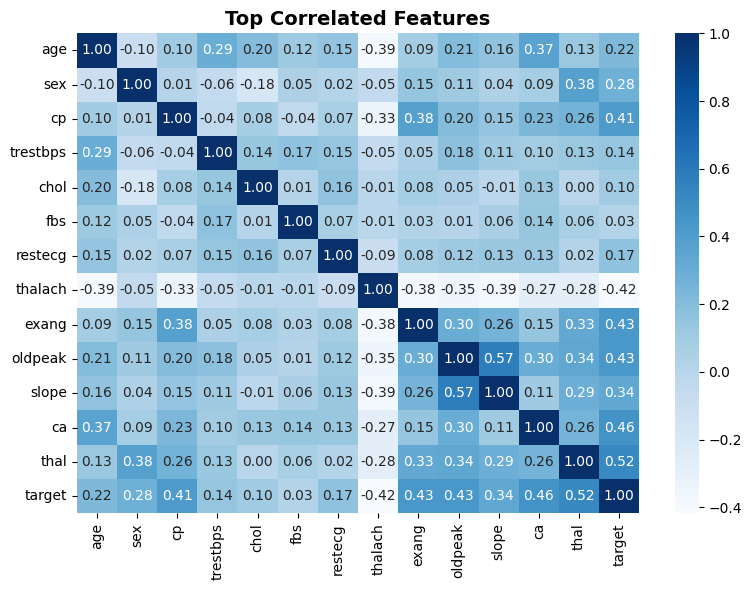

In [804]:
numeric_df=df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Top Correlated Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

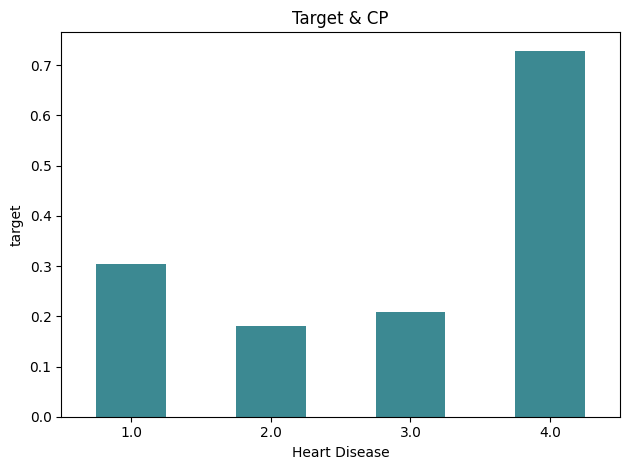

In [805]:

sns.barplot(data=df,x=df['cp'],y=df['target'],ci=None,color="#2e95a0",width=.5 )
plt.title('Target & CP')
plt.xlabel('Heart Disease')
plt.tight_layout()
plt.show()


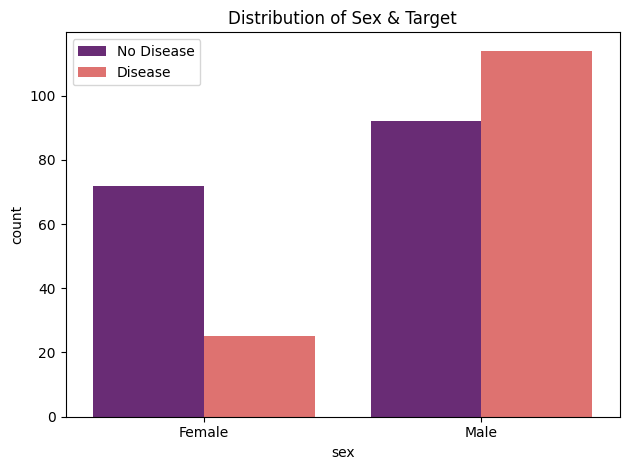

In [806]:
labels=['Female','Male']
labels_2=['No Disease','Disease']
sns.countplot(x=df['sex'],hue=df['target'],data=df,palette='magma')
plt.xticks([0,1],labels)
plt.legend(labels=labels_2)
plt.title("Distribution of Sex & Target")
plt.tight_layout()
plt.show()

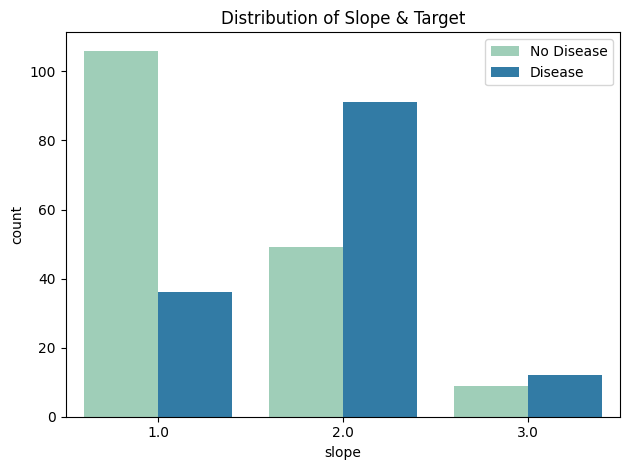

In [807]:
sns.countplot(x=df['slope'],hue=df['target'],data=df,palette='YlGnBu')
plt.legend(labels=labels_2)
plt.title("Distribution of Slope & Target")
plt.tight_layout()
plt.show()

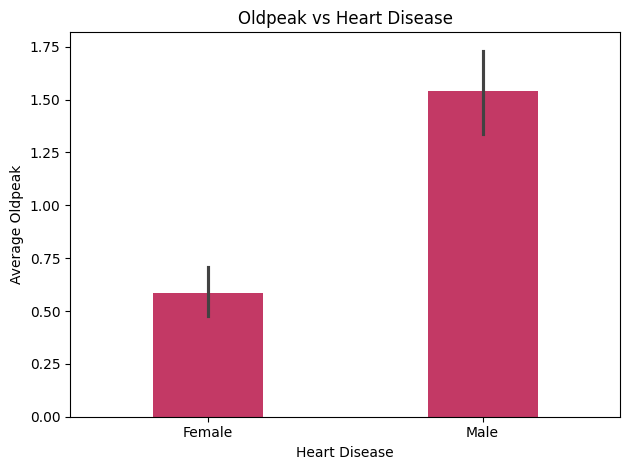

In [808]:
sns.barplot(data=df, x=df["target"], y=df["oldpeak"],width=.4,color="#DA225C86")
plt.ylabel("Average Oldpeak")
plt.title("Oldpeak vs Heart Disease")
plt.xticks([0,1],labels)
plt.xlabel('Heart Disease')
plt.tight_layout()
plt.show()

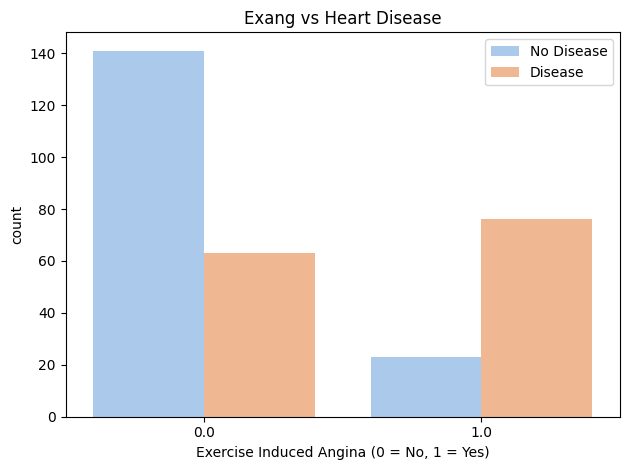

In [809]:
sns.countplot(x=df['exang'],hue=df['target'],data=df,palette='pastel')
plt.legend(labels=labels_2)
plt.xlabel("Exercise Induced Angina (0 = No, 1 = Yes)")
plt.title("Exang vs Heart Disease")
plt.tight_layout()
plt.show()

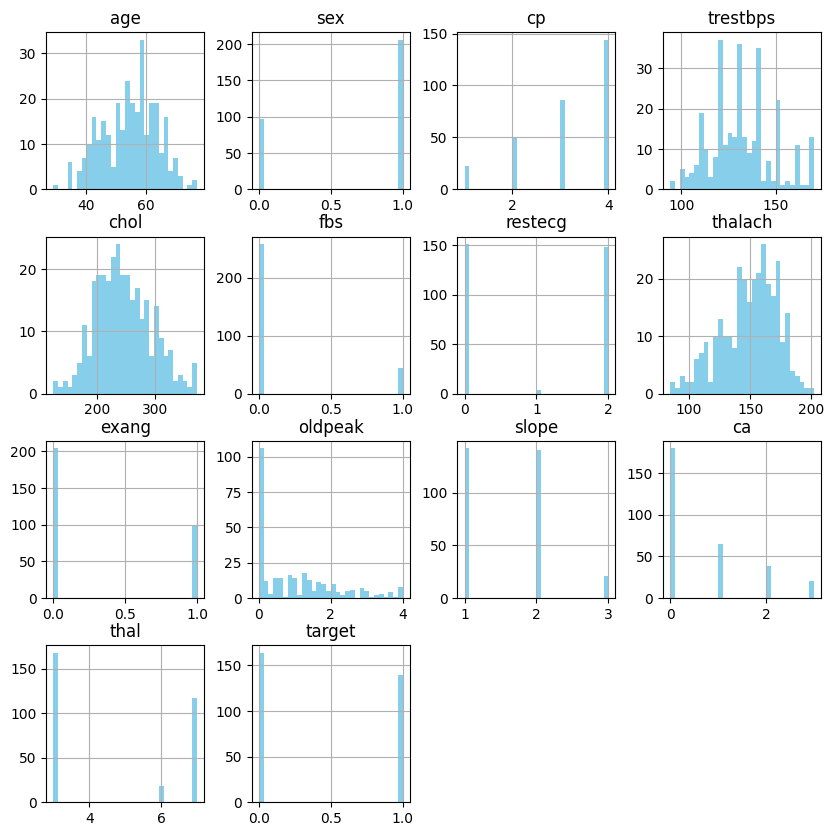

In [810]:
df.hist(figsize=(10,10),bins=30,color='skyblue')
plt.show()

Preprocessing Data

In [811]:
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

One Hot Encoder

In [812]:
try:
    encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
except TypeError:
    encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")

encoded = encoder.fit_transform(df[cat_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols), index=df.index)

df_model = pd.concat([df[num_cols], encoded_df, df[['target']]], axis=1)

In [813]:
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']

Feature Engineering

In [814]:
# New Features
df_model['chol_age_ratio'] = df['chol'] / df['age']
df_model['thalach_oldpeak_ratio'] = df['thalach'] / (df['oldpeak'] + 1e-5)
num_cols_extended = num_cols + ['chol_age_ratio', 'thalach_oldpeak_ratio']

Feauture Selection

Feature Importance (RandomForest)


In [815]:
X_all = df_model.drop("target", axis=1)
y = df_model["target"]

In [816]:
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_all, y)

RandomForestClassifier(random_state=42)

In [817]:
importances = rf_temp.feature_importances_
feat_imp = pd.DataFrame({"Feature": X_all.columns, "Importance": importances}).sort_values("Importance", ascending=False)
top_rf_features = feat_imp[feat_imp["Importance"] > feat_imp["Importance"].quantile(0.75)]["Feature"].tolist()
print("Selected Random Forest Features:", top_rf_features)

Selected Random Forest Features: ['thalach_oldpeak_ratio', 'cp_4.0', 'thalach', 'thal_7.0', 'oldpeak', 'age']


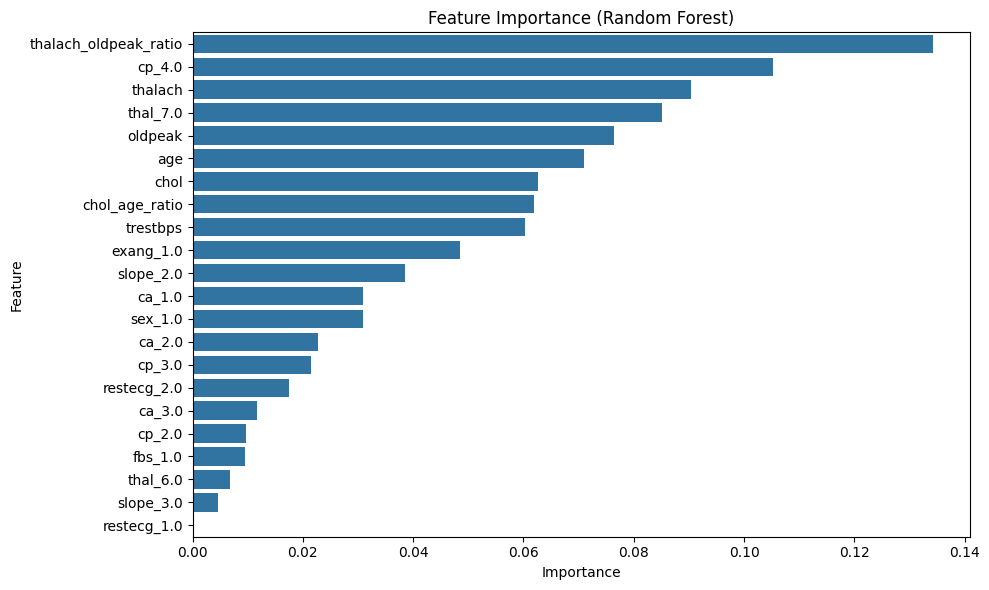

In [818]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

 Recursive Feature Elimination (RFE)

In [819]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)
lr = LogisticRegression(max_iter=5000, random_state=42)
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X_scaled, y)
rfe_features = X_all.columns[rfe.support_].tolist()

 Chi-Square Test

In [820]:
scaler_chi2 = MinMaxScaler()
X_chi2 = scaler_chi2.fit_transform(X_all)
chi2_selector = SelectKBest(chi2, k=10)
chi2_selector.fit(X_chi2, y)
chi2_features = X_all.columns[chi2_selector.get_support()].tolist()
print("Chi-Square Selected Features:", chi2_features)

Chi-Square Selected Features: ['oldpeak', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'exang_1.0', 'slope_2.0', 'ca_1.0', 'ca_2.0', 'thal_7.0', 'thalach_oldpeak_ratio']


Hybrid (chi2 + RF)

In [821]:
hybrid_features = list(set(chi2_features + top_rf_features))
print("Hybrid selected features:", hybrid_features)

Hybrid selected features: ['cp_2.0', 'cp_3.0', 'thal_7.0', 'thalach', 'oldpeak', 'ca_2.0', 'exang_1.0', 'age', 'ca_1.0', 'slope_2.0', 'thalach_oldpeak_ratio', 'cp_4.0']


In [822]:
X = X_all[hybrid_features]

PCA

In [823]:
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of PCA components to retain 95% variance: {n_components}")

Number of PCA components to retain 95% variance: 1


In [824]:
joblib.dump(pca, "pca_transformer.pkl")

['pca_transformer.pkl']

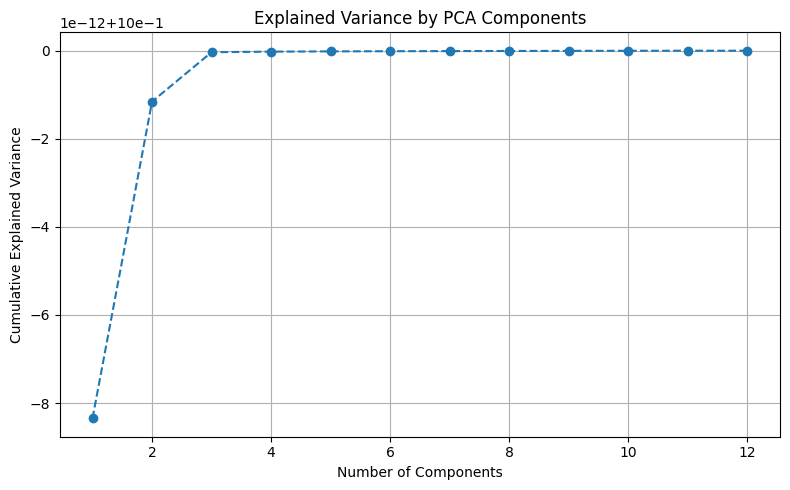

In [825]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.tight_layout()
plt.show()

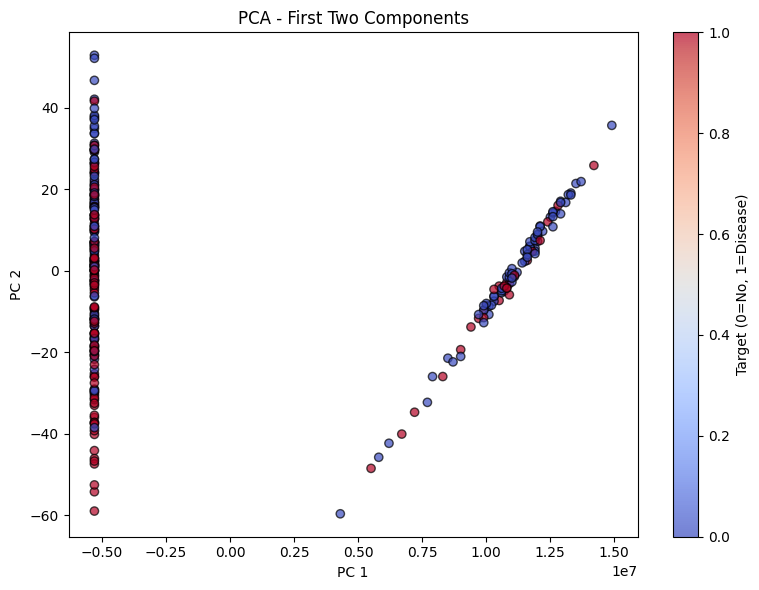

In [826]:
pca_vis = PCA(n_components=2)
X_pca_vis = pca_vis.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.7)
plt.xlabel("PC 1"); plt.ylabel("PC 2"); plt.title("PCA - First Two Components"); 
cbar = plt.colorbar(); cbar.set_label("Target (0=No, 1=Disease)")
plt.tight_layout()
plt.show()

Split Data

In [827]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Apply Smote

In [828]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Hyperparameter Tuning

In [829]:
# RF
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_tuned = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='roc_auc',
    n_iter=10,
    random_state=42,
    n_jobs=-1
)
rf_tuned.fit(X_train_resampled, y_train_resampled)
print("Best RF params:", rf_tuned.best_params_)

Best RF params: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 5}


In [830]:
# XGB
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.85, 1.0],
    'colsample_bytree': [0.7, 0.85, 1.0],
    'gamma': [0, 0.1, 0.3]
}
xgb_base = XGBClassifier(random_state=42, eval_metric='logloss', tree_method='hist')
xgb_tuned = RandomizedSearchCV(
    xgb_base, xgb_params,
    n_iter=12, cv=3, scoring='roc_auc',
    random_state=42, n_jobs=-1
)
xgb_tuned.fit(X_train_resampled, y_train_resampled)
print("Best XGB params:", xgb_tuned.best_params_)


Best XGB params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.85}


Supervised Learning

In [831]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

In [832]:
print("\nCross-Validation on resampled train (accuracy):")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f"{name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-Validation on resampled train (accuracy):
Logistic Regression: 0.7977 ± 0.0490
Decision Tree: 0.7177 ± 0.0379
Random Forest: 0.7823 ± 0.0498
SVM: 0.6297 ± 0.0321
XGBoost: 0.7710 ± 0.0341


Unsupervised Learning

In [833]:
inertia = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_) if k>1 else 0)

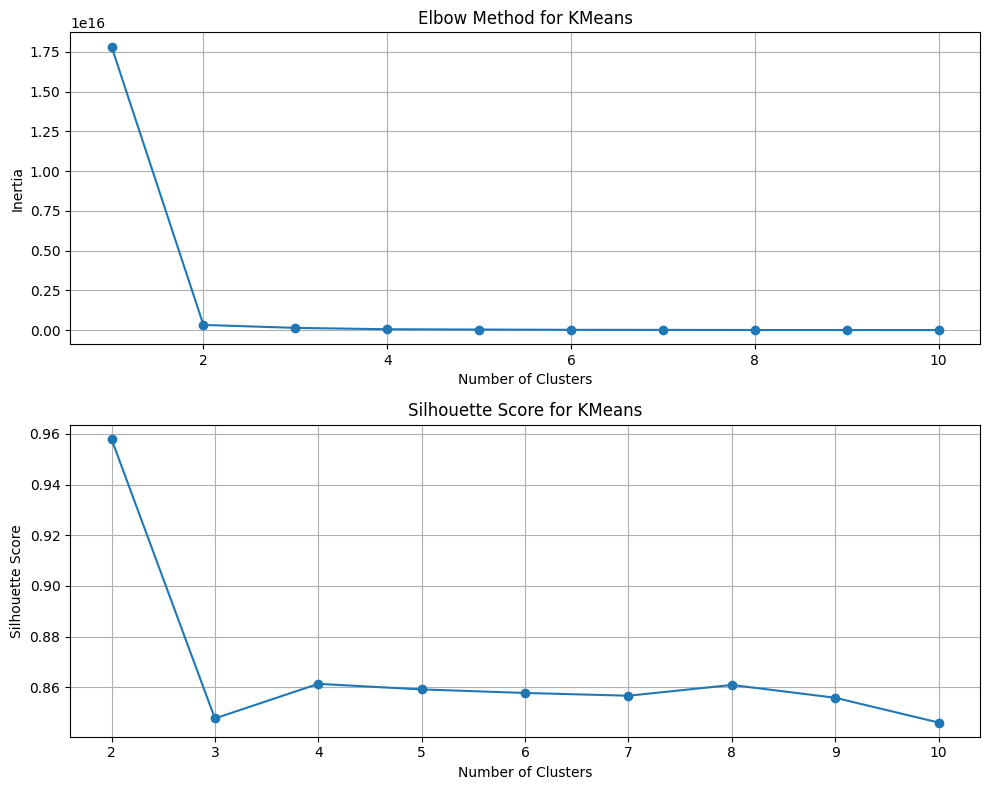

In [834]:
# Plot Elbow Method
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters") 
plt.ylabel("Inertia") 
plt.title("Elbow Method for KMeans") 
plt.grid(True)





# Plot Silhouette Scores
plt.subplot(2, 1, 2)
plt.plot(range(2, 11), silhouette_scores[1:], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score") 
plt.title("Silhouette Score for KMeans") 
plt.grid(True)
plt.tight_layout()
plt.show()



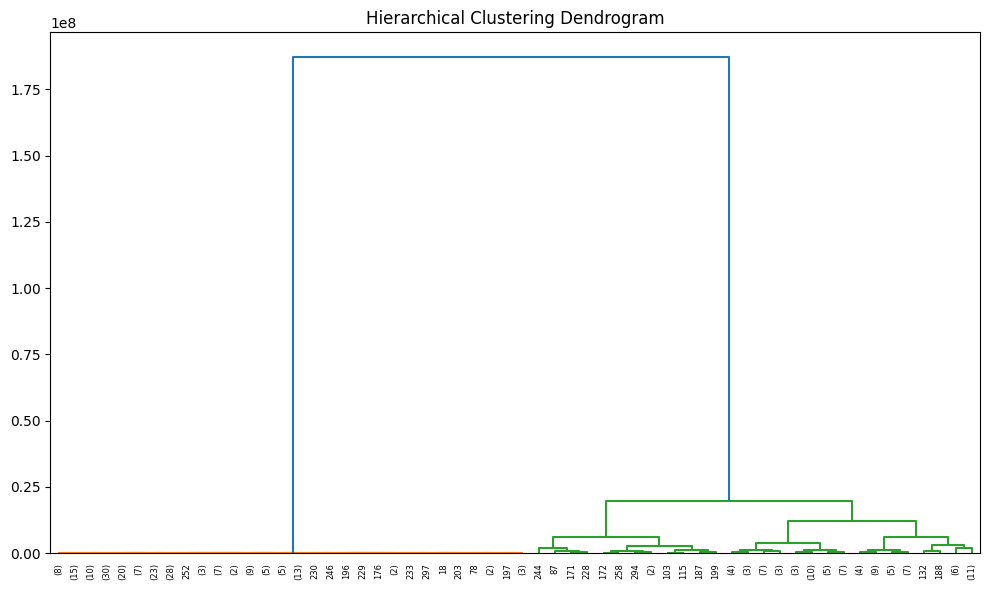

In [835]:
# Hierarchical Clustering
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.tight_layout()
plt.show()

Voting Classifier

In [836]:
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_tuned.best_estimator_),
        ('rf', RandomForestClassifier(**rf_tuned.best_params_, random_state=42))
    ],
    voting='soft',
    weights=[2, 1]  
)

Create pipeline with scaler and voting classifier

In [837]:
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),   
    ('model', voting_clf)
])

In [838]:
pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('xgb',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=0.85,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric='logloss',
                                                             feature_types=None,
                                                             feature_weights=None,
                                                             gamma=0.3,...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=4,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...)),
                                              ('rf',
                                               RandomForestClassifier(max_depth=5,
                                                                      min_samples_split=10,
                                                                      n_estimators=300,
                                                                      random_state=42))],
                                  voting='soft', weights=[2, 1]))])

In [839]:
calibrate = True
if calibrate:
    calibrated_model = CalibratedClassifierCV(pipeline, method='isotonic', cv=3)
    calibrated_model.fit(X_train_resampled, y_train_resampled)
    final_model = calibrated_model
else:
    final_model = pipeline

Training Model

In [840]:
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

Evalution 

In [841]:
print("\nFinal Model (Voting XGB + RF) Results @ threshold=0.5:")
print(classification_report(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Final Model (Voting XGB + RF) Results @ threshold=0.5:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.92      0.86      0.89        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Balanced Accuracy: 0.8982683982683983
ROC AUC: 0.9577922077922078


Confusion_Matrix

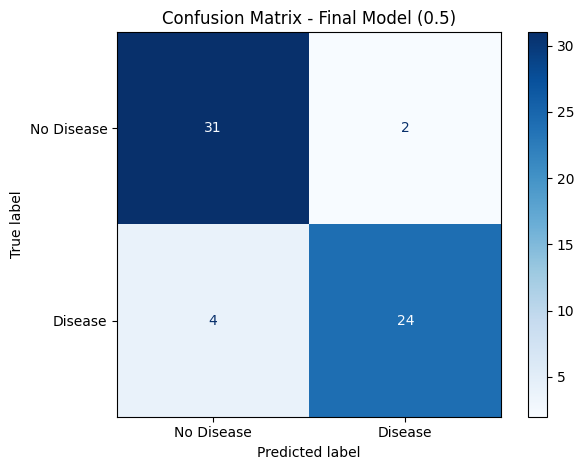

In [842]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Final Model (0.5)")
plt.tight_layout()
plt.show()

 ROC Curve

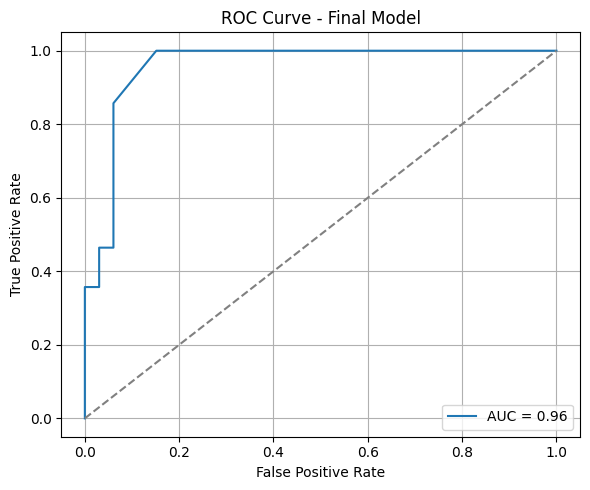

In [843]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Final Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 Precision-Recall Curve

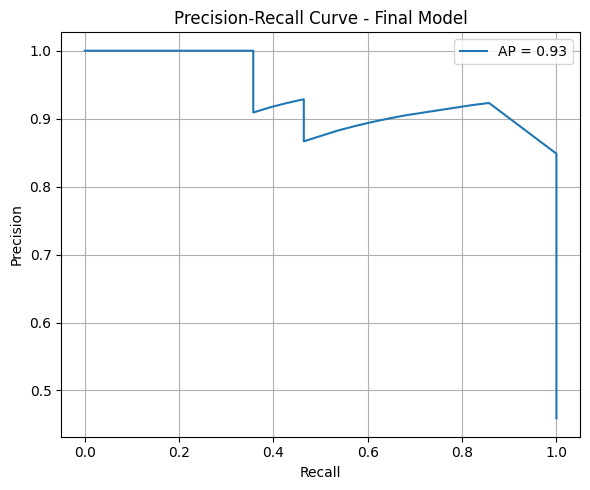

In [844]:
prec, rec, pr_th = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f"AP = {ap:.2f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Final Model")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


Threshold

In [845]:
youden_j = tpr - fpr
best_idx = np.argmax(youden_j)
best_threshold = thresholds[best_idx]
print(f"\nBest threshold by Youden's J: {best_threshold:.3f}")


Best threshold by Youden's J: 0.500


In [846]:
y_pred_opt = (y_proba >= best_threshold).astype(int)
print("\nReport @ Optimal Threshold:")
print(classification_report(y_test, y_pred_opt))
print("Balanced Accuracy @ Optimal:", balanced_accuracy_score(y_test, y_pred_opt))


Report @ Optimal Threshold:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        33
           1       0.85      1.00      0.92        28

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61

Balanced Accuracy @ Optimal: 0.9242424242424243


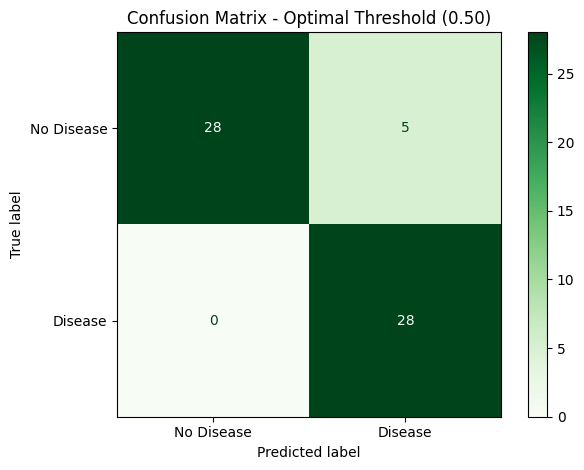

In [847]:
cm_opt = confusion_matrix(y_test, y_pred_opt)
disp_opt = ConfusionMatrixDisplay(confusion_matrix=cm_opt, display_labels=["No Disease", "Disease"])
disp_opt.plot(cmap="Greens")
plt.title(f"Confusion Matrix - Optimal Threshold ({best_threshold:.2f})")
plt.tight_layout()
plt.show()

Export Model

In [848]:
bundle = {
    "model": final_model,
    "threshold": float(best_threshold),
    "features": hybrid_features
}
joblib.dump(bundle, "heart_disease_model_bundle.pkl")
print("Saved: heart_disease_model.pkl, selected_features.pkl, heart_disease_model_bundle.pkl")


Saved: heart_disease_model.pkl, selected_features.pkl, heart_disease_model_bundle.pkl
